# 제한조건이 있는 최적화 문제

## 등식 제한 조건이 있는 최적화 문제

현실의 최적화 문제에서는 여러가지 제한 조건이 있는 최적화 문제(constrained optimization)가 많다. 가장 간단한 경우는 다음과 같이 등식(방정식) 제한 조건이 있는 경우이다.

$$ 
x^{\ast} = \text{arg} \min_x f(x) \;\; (x \in \mathbf{R}^N) \\  
g_j(x)=0 \;\; (j=1, \ldots, M) 
$$

예를 들어 목적 함수가 다음과 같은 경우,

$$ f(x_1, x_2) = x_1^2 + x_2^2 $$

다음처럼 등식(방정식) 제한 조건이 있는 경우를 생각해 보자.

$$ g(x_1, x_2) = x_1 + x_2 - 1 = 0 $$

이 문제는 다음 그림처럼 $g(x_1, x_2)=0$으로 정의되는 직선상에서 가장 $f(x_1, x_2)$ 값이 작아지는 점 $(x_1^{\ast}, x_2^{\ast})$를 찾는 문제가 된다.

In [1]:
# objective function f(x) = x1^2 + x2^2
def f1(x1, x2):
    return x1 ** 2 + x2 ** 2

In [2]:
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f1(X1, X2)

# constraint function g(x) = x1 + x2 - 1 = 0
x2_g = 1 - x1

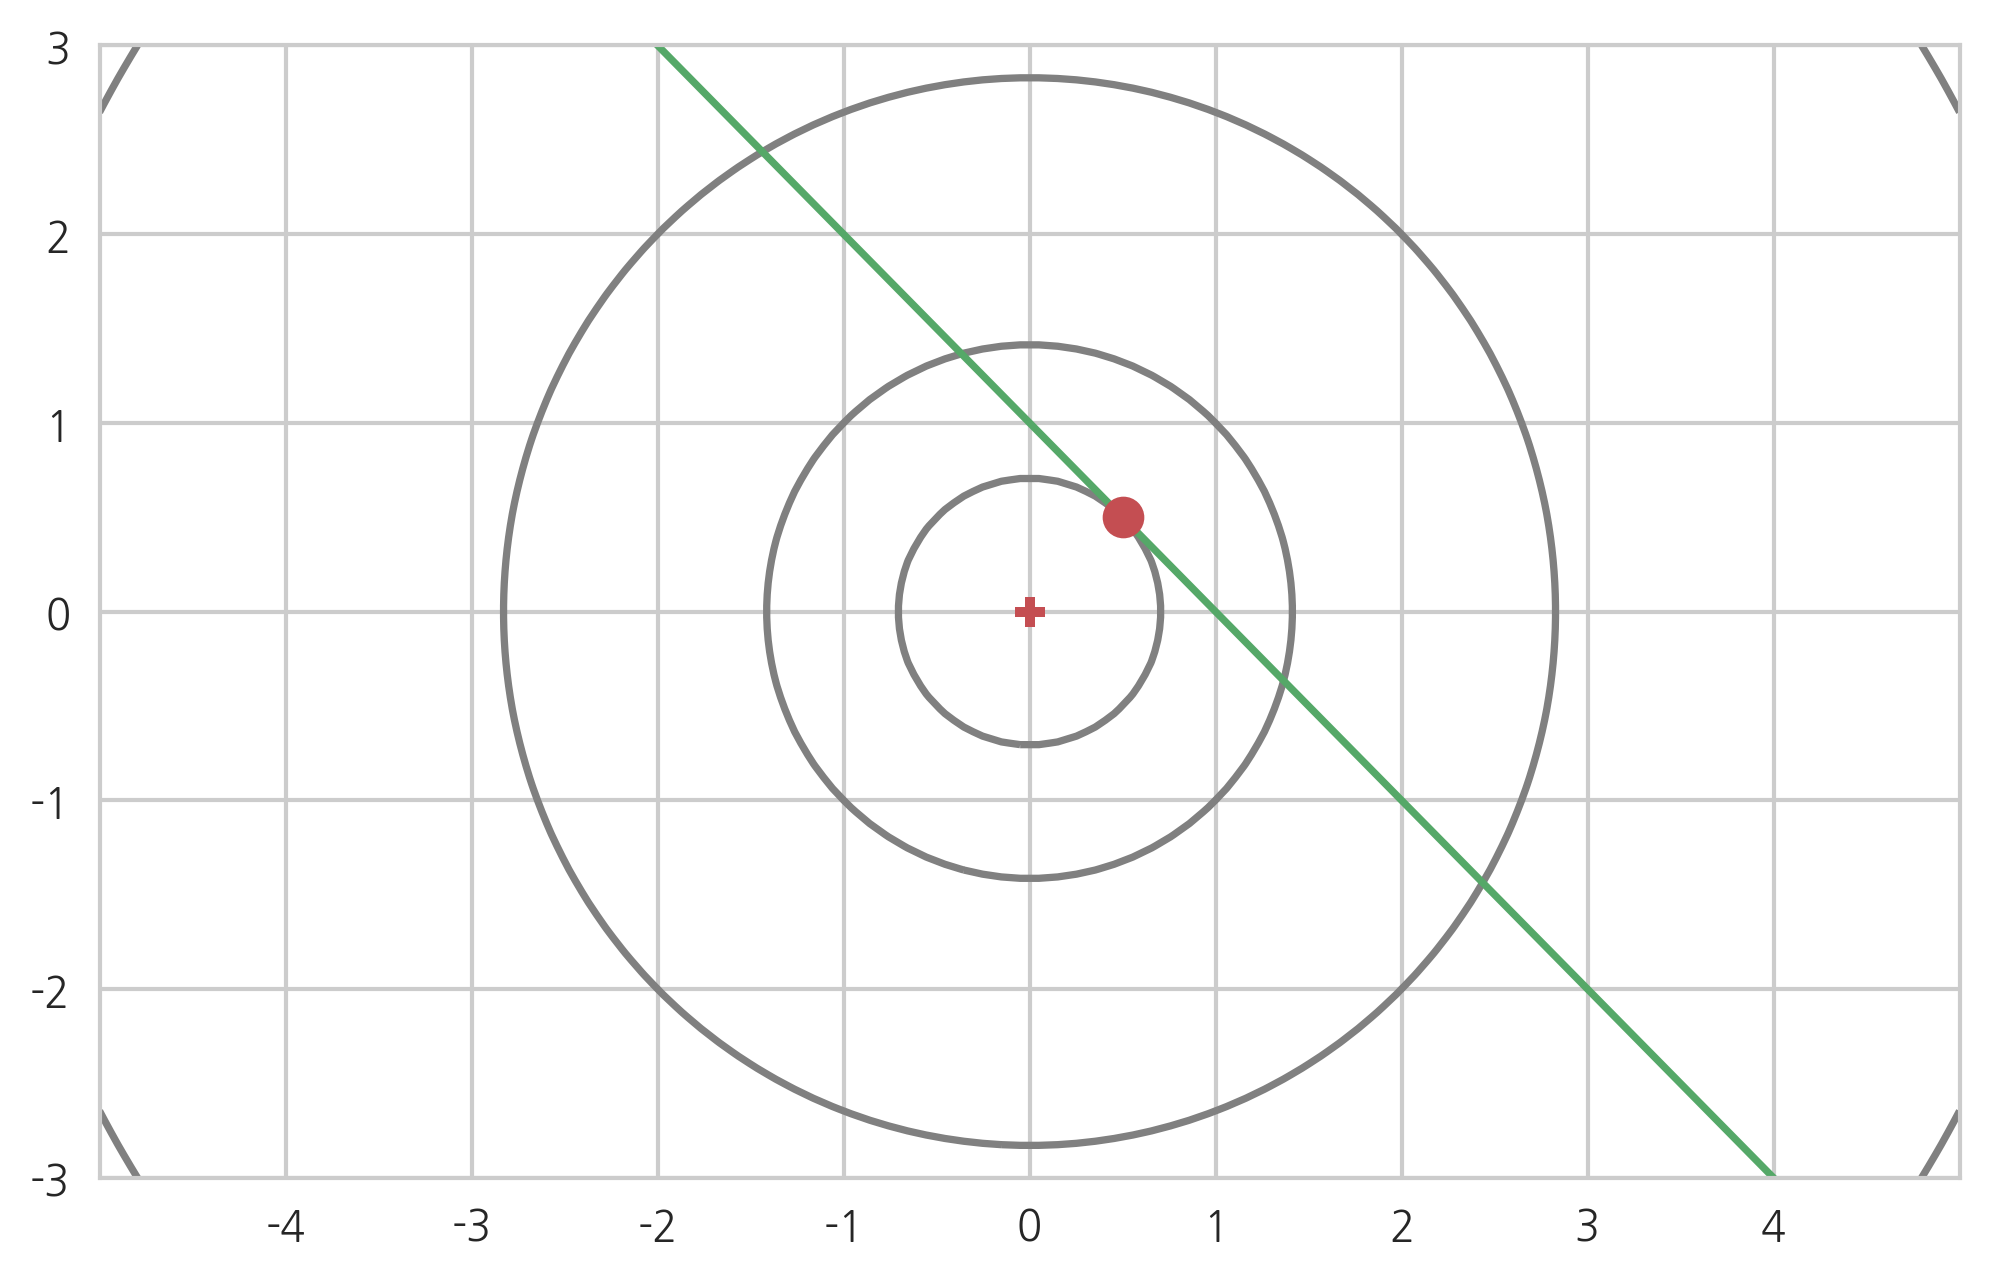

In [3]:
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')

plt.plot([0], [0], 'rP')
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-5, 5)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.show()

이렇게 등식 제한 조건이 있는 최적화 문제는 **라그랑주 승수법(Lagrange multiplier)**을 사용하여 최적화 할 수 있다.

라그랑주 승수 방법에서는 $f(x)$가 아닌 

$$h(x, \lambda) = f(x) + \sum_{j=1}^M \lambda_j g_j(x)$$

라는 함수를 목적함수로 보고 최적화한다.

$h$ 는 독립 변수 $\lambda$가 추가된 함수 $h(x_1, x_2, \ldots , x_N, \lambda_1, \ldots , \lambda_M) $가 되므로 다음 조건을 만족해야 한다.

$$ 
\begin{eqnarray}
\dfrac{\partial h(x, \lambda)}{\partial x_1} 
&=& \dfrac{\partial f}{\partial x_1} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_1} = 0 \\
\dfrac{\partial h(x, \lambda)}{\partial x_2} 
&=& \dfrac{\partial f}{\partial x_2} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_2} = 0 \\
\vdots & & \\
\dfrac{\partial h(x, \lambda)}{\partial x_N} 
&=& \dfrac{\partial f}{\partial x_N} + \sum_{j=1}^M \lambda_j\dfrac{\partial g_j}{\partial x_N} = 0 \\
\dfrac{\partial h(x, \lambda)}{\partial \lambda_1} &=& g_1 = 0 \\
\vdots & & \\
\dfrac{\partial h(x, \lambda)}{\partial \lambda_M} &=& g_M = 0 
\end{eqnarray}
$$

위에서 구한 $N+M$개의 연립 방정식을 풀면 $N+M$개의 미지수 $x_1, x_2, \ldots, x_N, , \lambda_1, \ldots , \lambda_M$를 구할 수 있다. 여기에서 $x_1, x_2, \cdots, x_N$ 이 제한 조건을 만족하는 최소값 위치를 나타낸다.

예를 들어 다음과 같은 함수 $f$를 최소화하는 문제를 라그랑주 승수법으로 풀어보자.

$$ f(x_1, x_2) = - \log{x_1} - \log{x_2} \\ x_1, x_2 > 0$$

여기에서 $x_1$, $x_2$는  $ x_1 + x_2 = 1 $ 을 만족해야 한다.

$$ h = f + \lambda g = -\log{x_1} - \log{x_2} + \lambda ( x_1 + x_2 - 1 ) $$

라그랑지 승수법을 적용하여 미분이 0인 위치를 구한다.

$$ 
\begin{eqnarray}
\dfrac{\partial h}{\partial x_1} 
&=& -\dfrac{1}{x_1} + \lambda = 0 \\
\dfrac{\partial h}{\partial x_2} 
&=& -\dfrac{1}{x_2} + \lambda = 0 \\
\dfrac{\partial h}{\partial \lambda} 
&=& x_1 + x_2 - 1 = 0 
\end{eqnarray}
$$

위 방정식을 풀면

$$ x_1 = x_2 = \dfrac{1}{2}, \;\;\; \lambda = 2 $$

#### 연습 문제 1

제한 조건이

$$ g(x) = x_1^2 + x_2^2 - 1 = 0 $$

일 때 목적 함수

$$ f(x) = x_1 + x_2 $$

를 최소화하는 $x_1$, $x_2$ 값을 라그랑주 승수법으로 계산하라. 

SciPy의 optimize 서브패키지에서는 제한 최적화 문제를 풀기위한 `fmin_slsqp` 명령을 제공한다.

In [12]:
def f1logs(x):
    return -np.log(x[0]) - np.log(x[1])

def eq_constraint(x):
    return x[0] + x[1] - 1

sp.optimize.fmin_slsqp(f1logs, np.array([1, 1]), eqcons=[eq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.3862943611198901
            Iterations: 2
            Function evaluations: 8
            Gradient evaluations: 2


array([ 0.5,  0.5])

## 부등식 제한 조건이 있는 최적화 문제

이번에는 다음과 같이 $ g(x) \leq 0 $ 이라는 부등식(inequality) 제한 조건이 있는 최적화 문제를 생각하자
 
$$ 
x^{\ast} = \text{arg} \min_x f(x) \\  
g_j(x) \leq 0 \;\; (j=1, \ldots, M) 
$$

이렇게 부등식 제한 조건이 있는 최적화 문제도 이 경우에도 라그랑지 승수 방법과 마찬가지로 $f$가 아닌 

$$h(x, \lambda) = f(x) + \sum_{j=1}^M \lambda_j g_j(x)$$

를 목적함수로 보고 최적화를 한다.

다만 이 경우의 최적화 필요 조건은 방정식 제한 조건의 경와 달리 **KKT(Karush-Kuhn-Tucker) 조건**이라고 하며 다음처럼 3개의 조건으로 이루어진다. 

(1) 모든 독립 변수에 대한 미분이 0

$$  \dfrac{\partial h(x, \lambda)}{\partial x_i} = 0 $$

(2) 모든 라그랑지 승수와 부등식의 곱이 0

$$  \lambda_j \cdot \dfrac{\partial h(x, \lambda)}{\partial \lambda_j} = \lambda \cdot g_j = 0 $$

(3) 음수가 아닌 라그랑지 승수

$$  \lambda_j \geq 0 $$

첫번째 조건은 방정식 제한 조건의 경우와 같다.

마지막 조건은 KKT 조건이 실제로 부등식 제한 조건이 있는 최적화 문제와 같은 문제임을 보장(strong duality)하기 위한 조건이다.

두번째 조건을 보면 목적함수에 대한 미분값이 반드시 0이 될 필요가 없다는 것을 알 수 있다.
방정식 제한 조건의 경우처럼 목적함수에 대한 미분값 $\frac{\partial (f + \lambda g)}{\partial \lambda}=g$이 0이어도 되지만 그렇지 않고 라그랑지 승수 $\lambda$ 값 자체가 0이 되어도 괜찮다. 그 이유는 다음과 같다.

부등식 제한 조건이 있는 최적화 문제를 풀면 그 제한 조건은 실제로 다음 두 가지 경우의 하나가 되어 버린다.

* 최적화 결과에 전혀 영향을 주지 않는 쓸모없는 제한 조건
* 최적화 결과에 영향을 주는 **등식인** 제한 조건

이를 수식으로 표현하면 다음과 같다. 이 식에서 $x^{\ast}, \lambda^{\ast}$는 KKT 조건을 풀어서 구한 최적해의 값이다. 

$$ \lambda^{\ast} = 0 \;\; \text{or} \;\;  g(x^{\ast}) = 0 $$

만약  $\lambda^{\ast}=0$이면 $h(x^{\ast}, \lambda^{\ast}) =f(x^{\ast})$이므로 제한 조건이 아무런 의미가 없어진다. 

반대로 $g(x^{\ast}) = 0$이면 이 조건은 부등식 제한 조건이 아닌 **등식** 제한 조건이 된다. 

다음 그림은 부등식 제한 조건을 가지는 최적화의 예이다. 

목적 함수는

$$ f(x_1, x_2) = x_1^2 + x_2^2 $$


왼쪽 그림은 부등식 제한 조건이

$$ g(x_1, x_2) = x_1 + x_2 - 1 \leq 0 $$

오른쪽 그림은 부등식 제한 조건이

$$ g(x_1, x_2) = -x_1 - x_2 + 1 \leq 0 $$

인 경우이다.

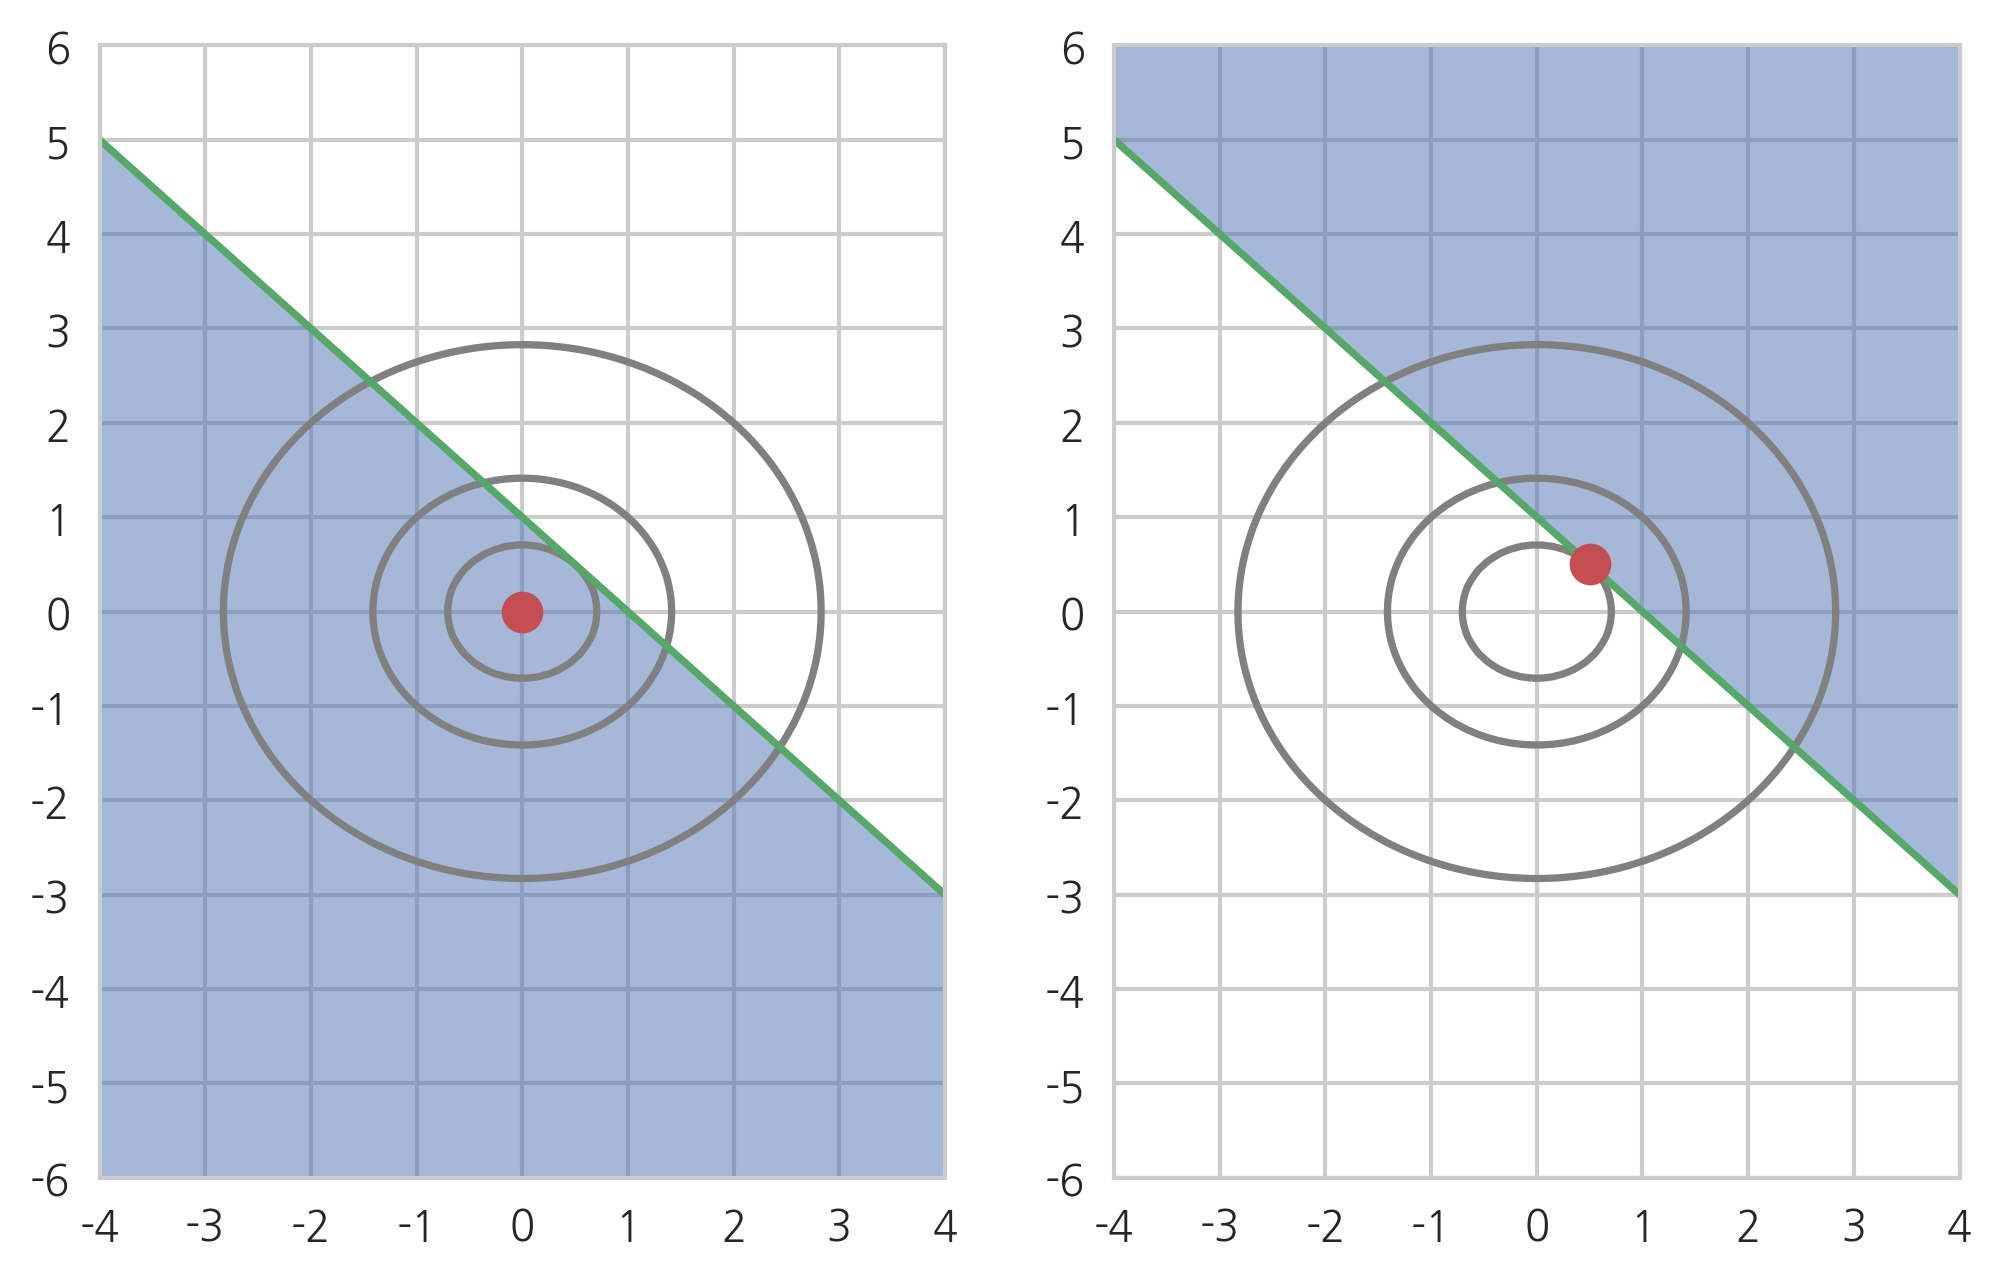

In [5]:
ax1 = plt.subplot(121)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')
ax1.fill_between(x1, -20, x2_g, alpha=0.5)
plt.plot([0], [0], 'ro', ms=10)

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-6, 6, 13))

ax2 = plt.subplot(122)
plt.contour(X1, X2, Y, colors="gray", levels=[0.5, 2, 8, 32])
plt.plot(x1, x2_g, 'g-')
ax2.fill_between(x1, 20, x2_g, alpha=0.5)
plt.plot([0.5], [0.5], 'ro', ms=10)

plt.xlim(-3, 3)
plt.ylim(-6, 6)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-6, 6, 13))

plt.show()

다음은 복수의 부등식 제한 조건이 있는 2차원 최적화 문제의 예이다.

$$ \text{arg} \min_x \; (x_1-4)^2 + (x_2-2)^2 $$

$$ g_1(x) = x_1 + x_2 - 1\leq 0 $$

$$ g_2(x) = -x_1 + x_2 - 1\leq 0 $$

$$ g_3(x) = -x_1 - x_2 - 1\leq 0 $$

$$ g_4(x) = x_1 - x_2 - 1\leq 0 $$

이 4개의 제한 조건은 다음과 같은 하나의 부등식으로 나타낼 수도 있다.

$$ g(x) = |x_1| + |x_2| - 1 = \sum_{i=1}^{2} |x_i| - 1 \leq 0 $$

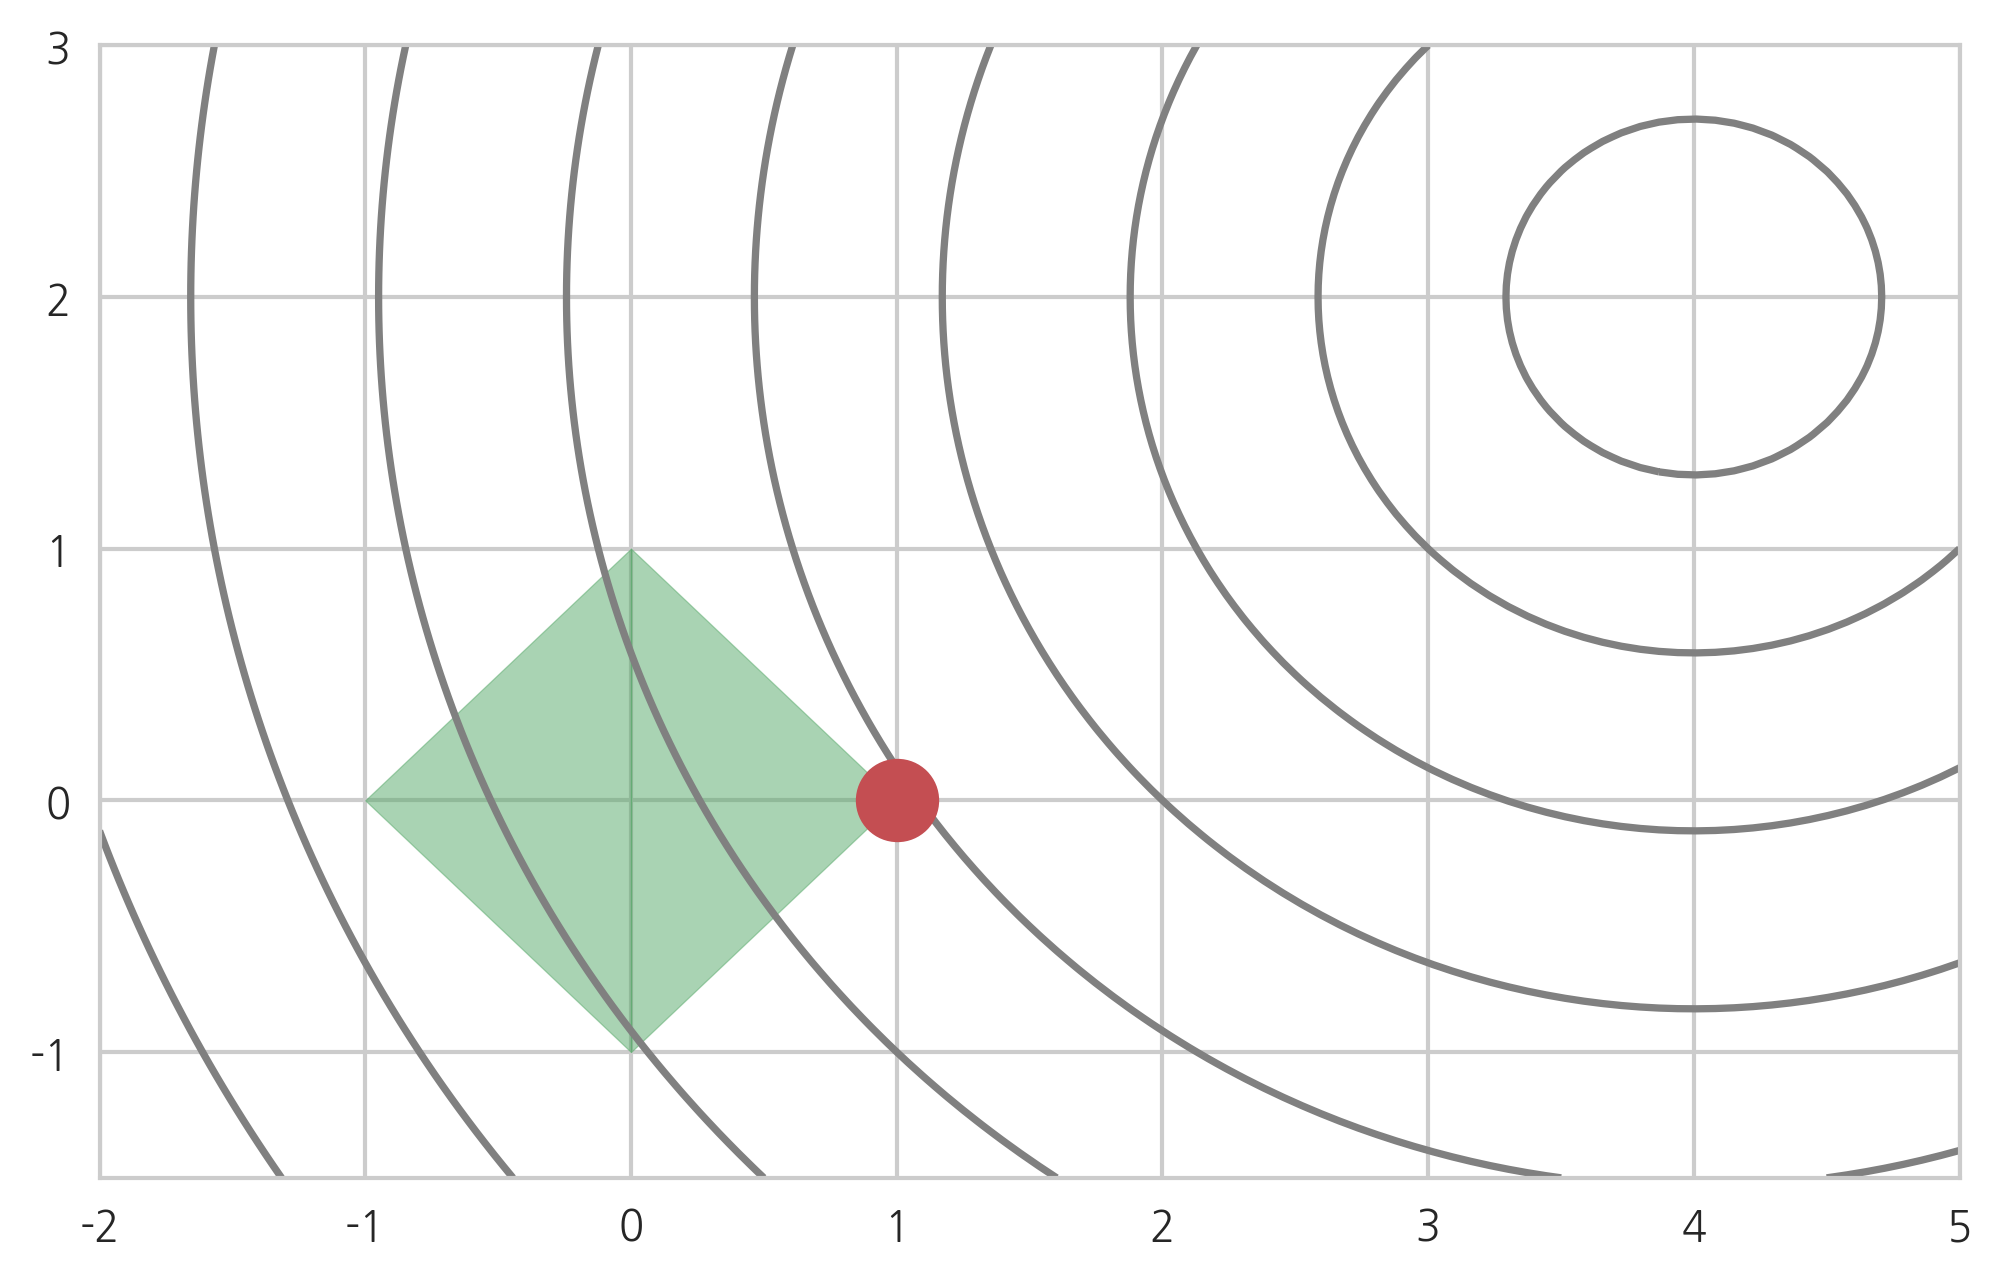

In [13]:
def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)

x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f2plt(X1, X2)

plt.contour(X1, X2, Y, colors="gray", levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))

ax = plt.gca()
x12 = np.linspace(-1, 0, 10)
x13 = np.linspace(0, 1, 10)
ax.fill_between(x12, x12 + 1, -1 - x12, color='g', alpha=0.5)
ax.fill_between(x13, x13 - 1, 1 - x13, color='g', alpha=0.5)

plt.plot(1, 0, 'ro', ms=20)

plt.xlim(-2, 5)
plt.ylim(-1.5, 3)
plt.xticks(np.linspace(-2, 5, 8))
plt.yticks(np.linspace(-1, 3, 5))
plt.show()

 `fmin_slsqp` 명령은 이렇게 부등식 제한 조건이 있는 경우에도 사용할 수 있다. 단 `ieqcons` 인수에 들어가는 부등호의 부호가 위에서 서술한 것과 달리 0 또는 양수이어야 한다. ($g \geq 0$)

In [14]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

def ieq_constraint(x):
    return np.atleast_1d(1 - np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.6055512804550336
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11


array([  9.99999982e-01,   1.79954011e-08])

#### 연습 문제 2

위 문제에서 최적해가 

$$ x_1 = 1, \; x_2 = 0 $$

이라는 사실을 이용하여 
라그랑지 승수 $\lambda_1$, $\lambda_2$, $\lambda_3$, $\lambda_4$를 각각 구하라. 어느 값이 0이 되는가?  

#### 연습 문제 3

위 문제에서 제한 조건을 다음과 같이 바꾼다.

$$ g(x) = |x_1| + |x_2| - k = \sum_{i=1}^{2} |x_i| - k \leq 0 $$

여기에서 $k$의 값을 0.1 부터 10까지 다양하게 변화시키면서 최적화의 해가 어떻게 달라지는지 살펴보라.